In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Load Dataset
df = pd.read_csv("train.csv")

# **DATA UNDERSTANDING**

In [17]:
# 2. Statistik Deskriptif
print("Statistik Deskriptif:")
print(df.describe())

Statistik Deskriptif:
       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ..

In [18]:
# 3. Cek Tipe Data dan Missing Value
print("\nInformasi Dataset:")
print(df.info())

print("\nJumlah Missing Value Tiap Kolom:")
print(df.isnull().sum())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   i

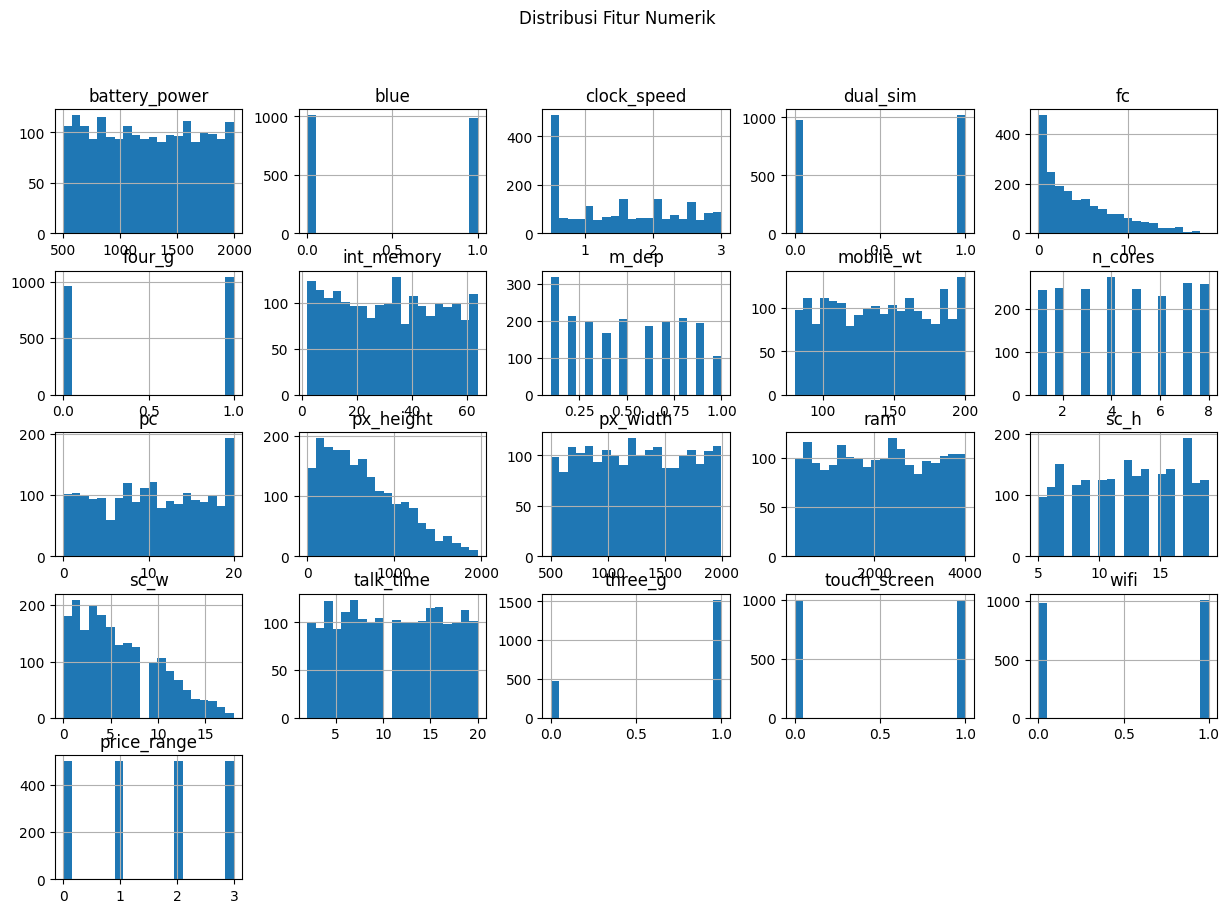

In [19]:
# 4. Distribusi Setiap Fitur Numerik (Histograms)
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_features].hist(figsize=(15,10), bins=20)
plt.suptitle("Distribusi Fitur Numerik")
plt.show()

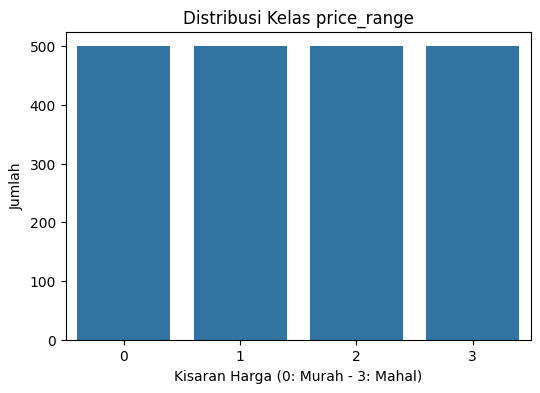

In [20]:
# 5. Distribusi Kelas Target (price_range)
plt.figure(figsize=(6,4))
sns.countplot(x='price_range', data=df)
plt.title("Distribusi Kelas price_range")
plt.xlabel("Kisaran Harga (0: Murah - 3: Mahal)")
plt.ylabel("Jumlah")
plt.show()

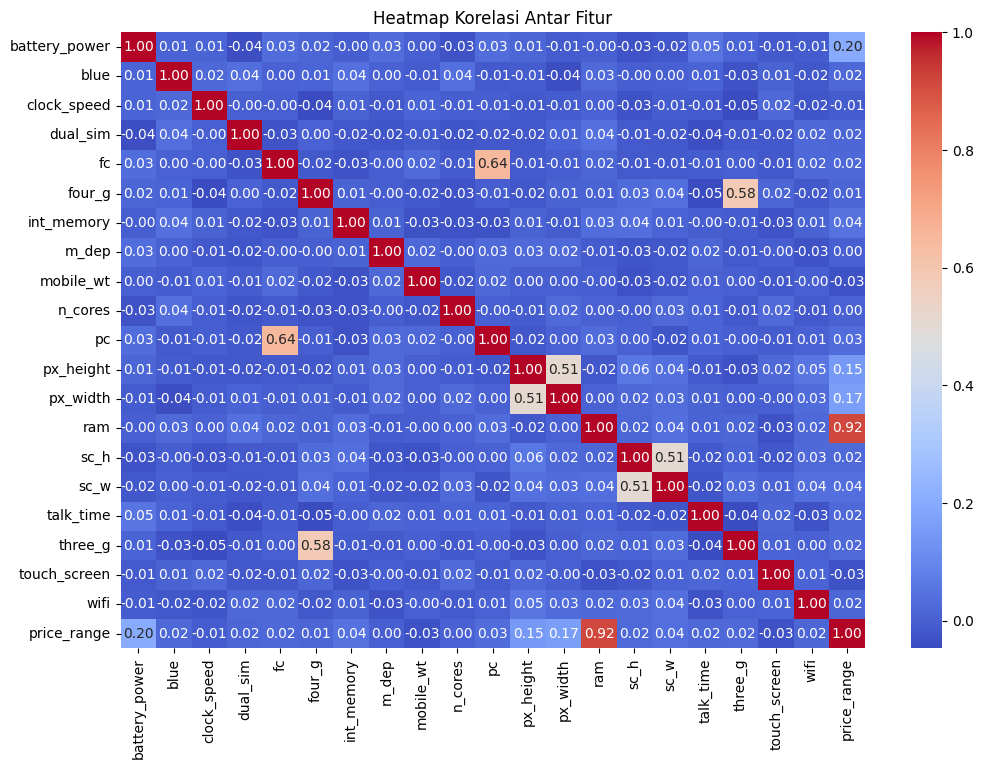

In [21]:
# 6. Korelasi Antar Fitur
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

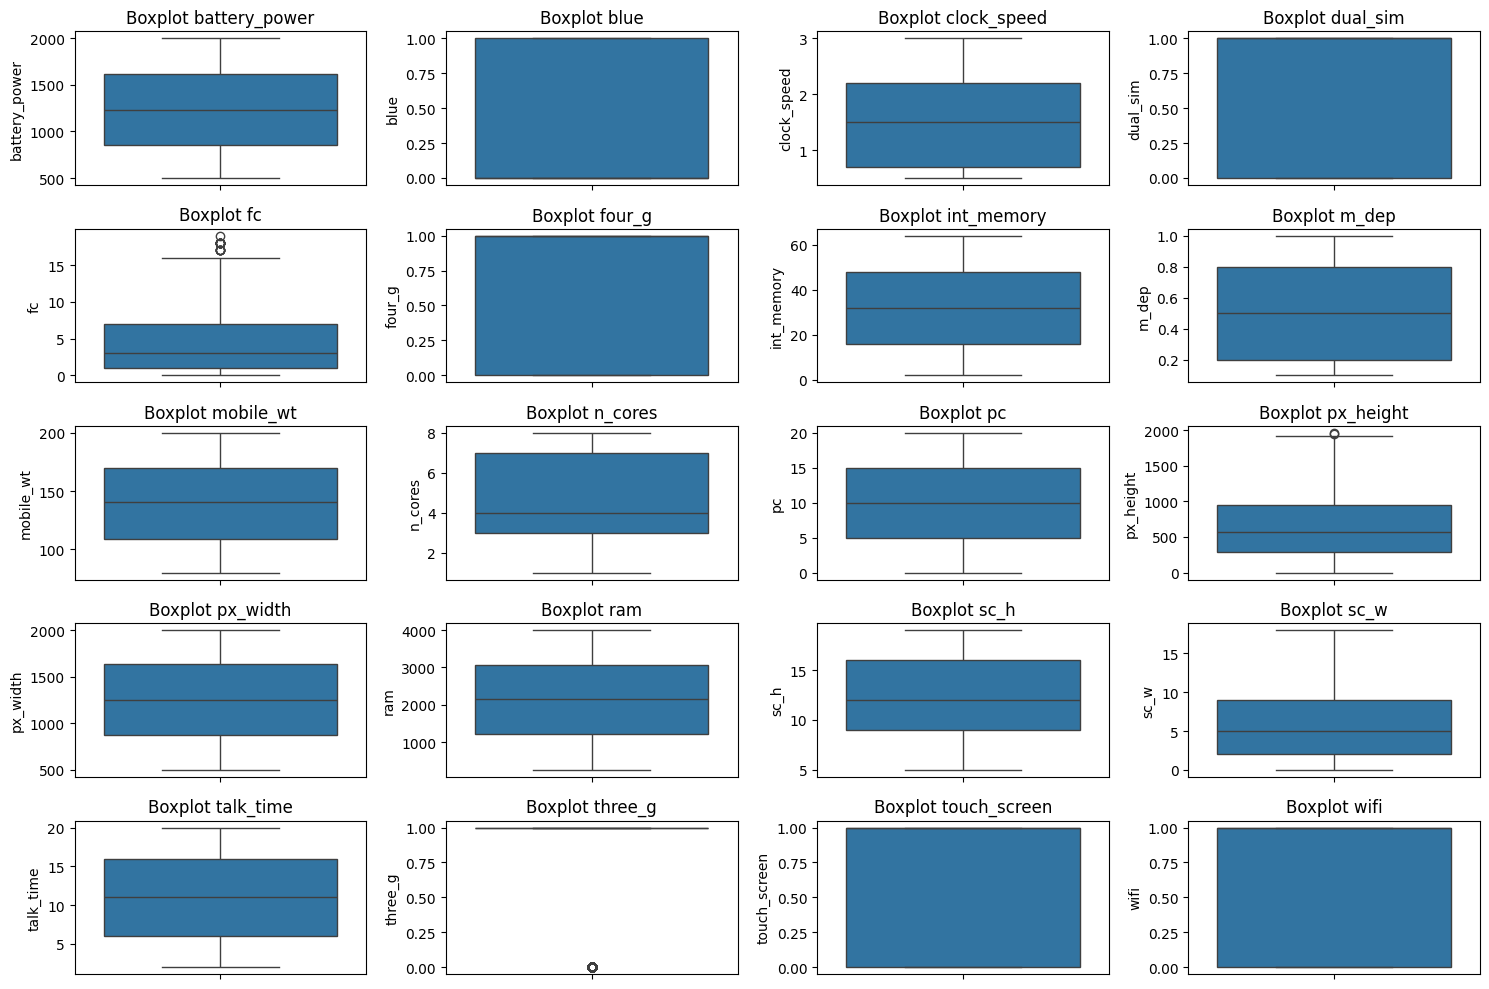

In [22]:
# 7. Deteksi Outlier (Boxplot)
plt.figure(figsize=(15, 10))
n_cols = 4
n_rows = (len(numeric_features[:-1]) + n_cols - 1) // n_cols

for i, col in enumerate(numeric_features[:-1]):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

# **DATA PREPARATION**

In [23]:
# 1. Feature Selection
selected_features = [
    'battery_power', 'blue', 'dual_sim', 'fc', 'four_g',
    'int_memory', 'm_dep', 'mobile_wt', 'pc', 'wifi'
]
target = 'price_range'
df_selected = df[selected_features + [target]]

In [24]:
# 2. Handling Outliers
# (e.g., IQR method or z-score can be added here if needed)

# Menggunakan metode IQR untuk mendeteksi dan menghapus outliers pada fitur yang dipilih
Q1 = df_selected[selected_features].quantile(0.25)
Q3 = df_selected[selected_features].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus baris yang mengandung outlier pada setidaknya satu fitur yang dipilih
# Perhatikan: Strategi penanganan outlier bisa bervariasi (misalnya, capping, transformasi, dll.)
# Menghapus adalah salah satu strategi.
df_selected_no_outliers = df_selected[~((df_selected[selected_features] < lower_bound) | (df_selected[selected_features] > upper_bound)).any(axis=1)]

# Gunakan df_selected_no_outliers untuk langkah-langkah selanjutnya (normalisasi, splitting)

print(f"Jumlah baris sebelum penanganan outlier: {len(df_selected)}")
print(f"Jumlah baris setelah penanganan outlier (menggunakan IQR dan menghapus): {len(df_selected_no_outliers)}")

# Update df_selected untuk digunakan di langkah selanjutnya
df_selected = df_selected_no_outliers

# Add a step to drop rows with NaN in the target column after outlier handling
# This ensures that the target variable used for stratification is clean
df_selected.dropna(subset=[target], inplace=True)
print(f"Jumlah baris setelah menghapus NaN pada kolom target: {len(df_selected)}")

Jumlah baris sebelum penanganan outlier: 2000
Jumlah baris setelah penanganan outlier (menggunakan IQR dan menghapus): 1982
Jumlah baris setelah menghapus NaN pada kolom target: 1982


In [25]:
# 3. Data Normalization (Min-Max Scaling)
scaler = MinMaxScaler()

# Ensure that only the selected features are scaled
df_scaled_values = scaler.fit_transform(df_selected[selected_features])
df_scaled = pd.DataFrame(df_scaled_values, columns=selected_features, index=df_selected.index) # Preserve index to align with target

# Tambahkan kembali label target from the cleaned df_selected
df_scaled[target] = df_selected[target]

In [26]:
# 4. Data Splitting for Supervised Learning
X = df_scaled[selected_features]
y = df_scaled[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [27]:
# 5. Data Preparation for Clustering
X_cluster = df_scaled[selected_features]

# Cek bentuk data
print("Train set:", X_train.shape)
print("Test set:", X_test.shape)
print("Clustering data:", X_cluster.shape)

Train set: (1585, 10)
Test set: (397, 10)
Clustering data: (1982, 10)


# **MODELING**

Akurasi Naive Bayes: 0.2947103274559194

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.43      0.36        99
           1       0.28      0.11      0.16        99
           2       0.26      0.16      0.20       100
           3       0.31      0.47      0.37        99

    accuracy                           0.29       397
   macro avg       0.29      0.30      0.27       397
weighted avg       0.29      0.29      0.27       397



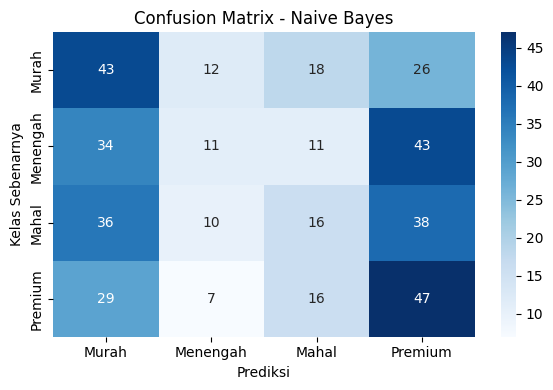

In [29]:
# [ALternative] Naive Bayes Classifier

# === 6. Modeling: Naive Bayes ===
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# === 7. Evaluasi Model ===
y_pred = model_nb.predict(X_test)

# Akurasi dan laporan klasifikasi
print("Akurasi Naive Bayes:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Murah", "Menengah", "Mahal", "Premium"],
            yticklabels=["Murah", "Menengah", "Mahal", "Premium"])
plt.xlabel("Prediksi")
plt.ylabel("Kelas Sebenarnya")
plt.title("Confusion Matrix - Naive Bayes")
plt.tight_layout()
plt.show()

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.29      0.37      0.32        99
           1       0.28      0.13      0.18        99
           2       0.27      0.20      0.23       100
           3       0.31      0.46      0.37        99

    accuracy                           0.29       397
   macro avg       0.29      0.29      0.28       397
weighted avg       0.29      0.29      0.28       397

=== Confusion Matrix ===
[[37 14 22 26]
 [37 13 13 36]
 [31  8 20 41]
 [24 11 18 46]]


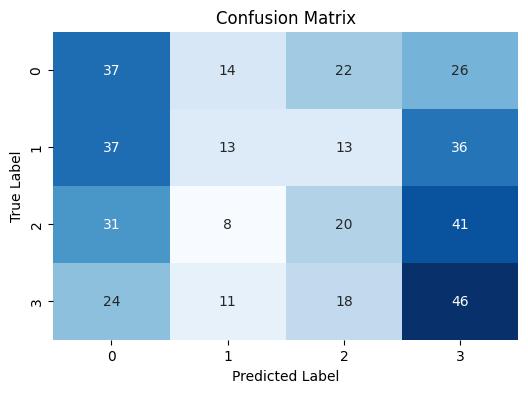

In [30]:
# 2. Supervised Modeling: Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("=== Classification Report ===")
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

C:\Users\sanja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\sanja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_

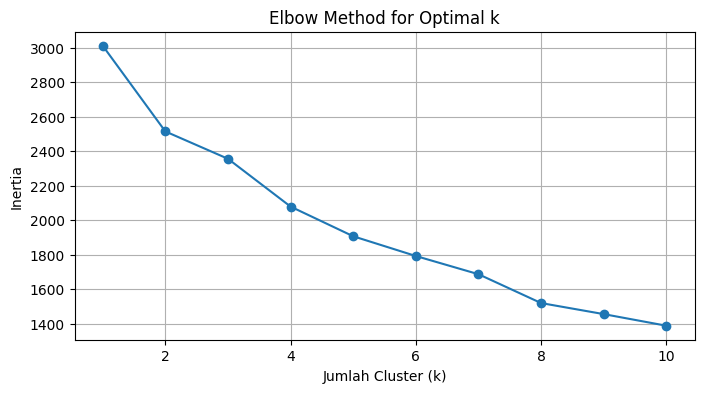

Silhouette Score (k=4): 0.1647


In [31]:
# 3. Unsupervised Modeling: K-Means Clustering
# Gunakan Elbow Method
inertia = []
range_k = range(1, 11)
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Menggunakan X_cluster yang hanya berisi fitur untuk clustering
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 4))
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Pilih k optimal, misalnya k=4 sesuai price_range
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
# Menggunakan X_cluster yang hanya berisi fitur untuk clustering
clusters = kmeans.fit_predict(X_cluster)

# Evaluasi Clustering dengan Silhouette Score
# Menggunakan X_cluster untuk evaluasi Silhouette Score
sil_score = silhouette_score(X_cluster, clusters)
print(f"Silhouette Score (k={k_optimal}): {sil_score:.4f}")

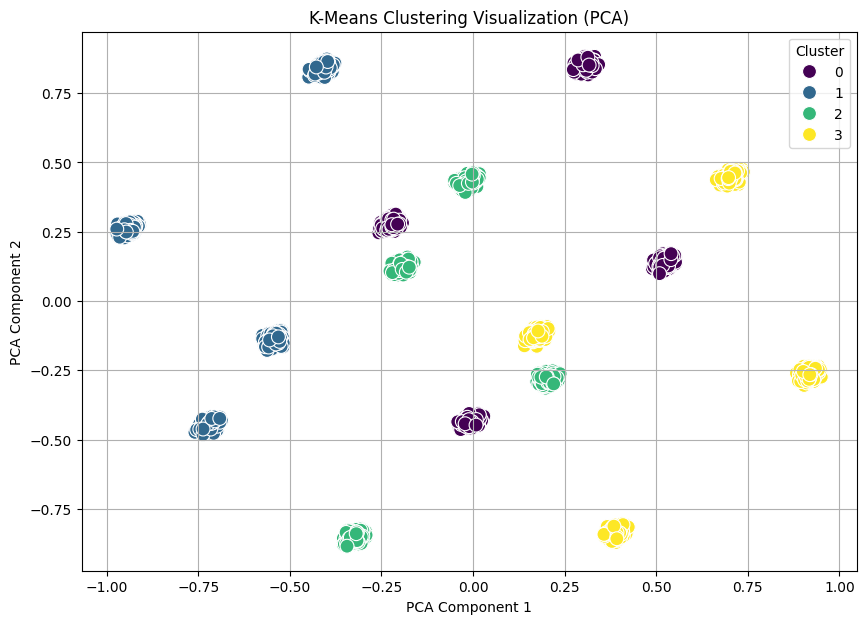

In [32]:
# 2. Apply PCA to reduce dimensions to 2 for visualization
# Use X_cluster which contains the features used for clustering
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster)

# 3. Create a DataFrame for plotting
# Include cluster labels
pca_df = pd.DataFrame(data=X_pca, columns=['PCA 1', 'PCA 2'])
# Add the cluster labels from the KMeans fit
pca_df['Cluster'] = clusters # 'clusters' variable holds the cluster assignments from the previous step

# 4. Visualize the clusters using the PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA 1', y='PCA 2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('K-Means Clustering Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

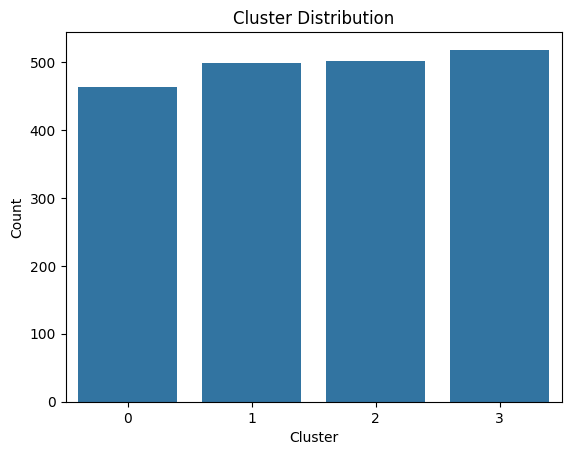

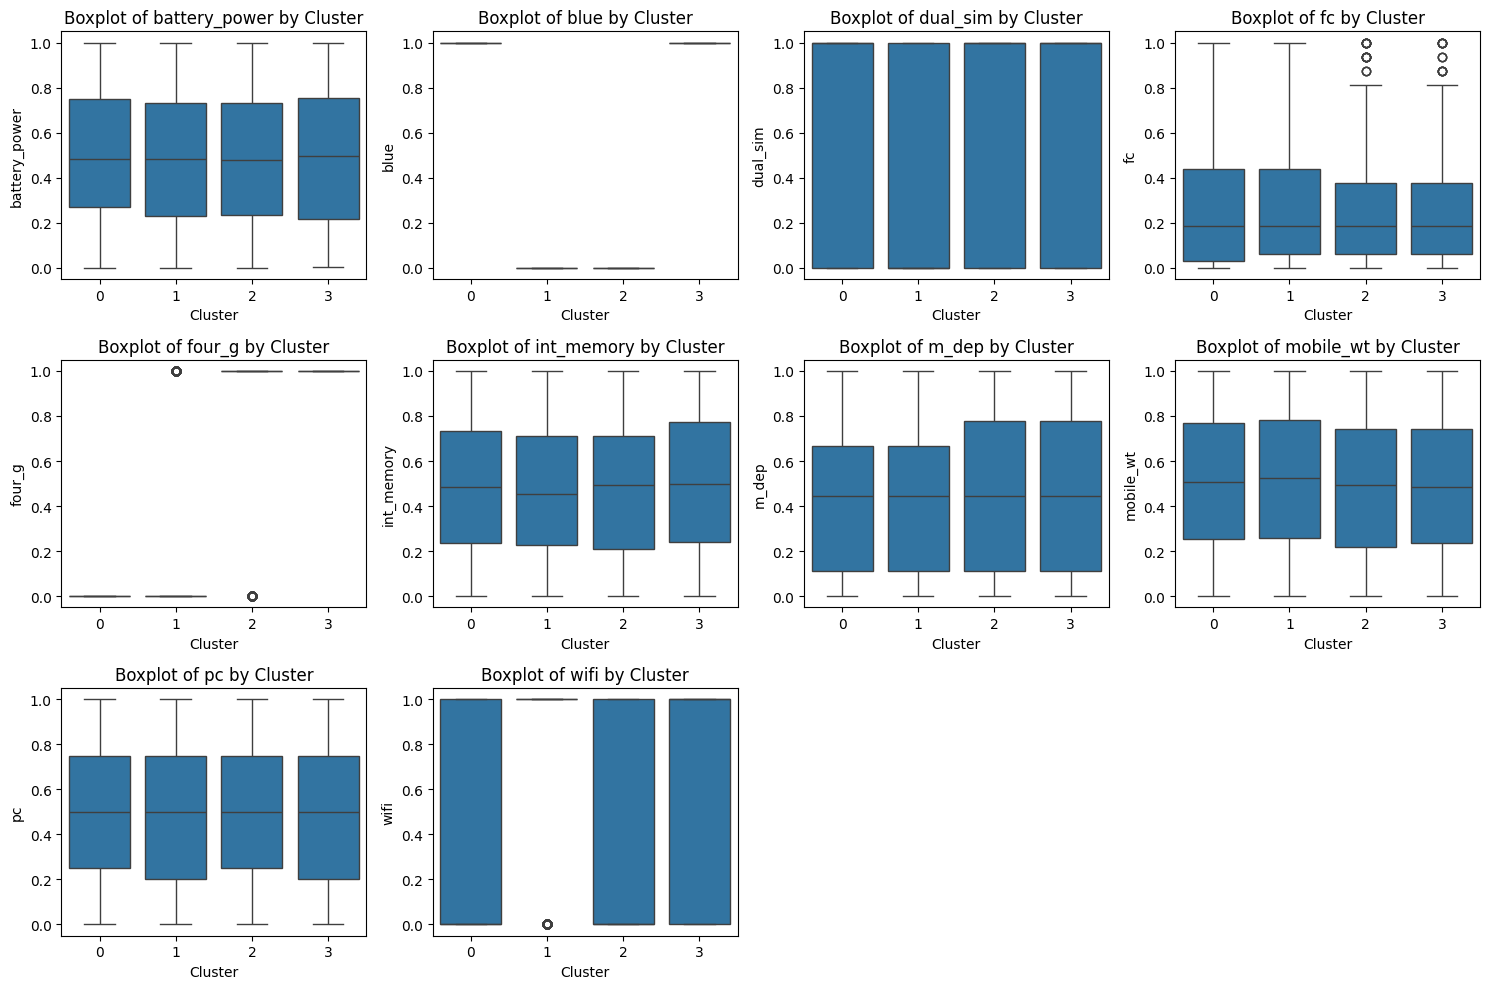

In [33]:
# Distribution of clusters
sns.countplot(x=clusters)
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Boxplot of clusters
# Use X_cluster which contains the features used for clustering
# Convert X_cluster (which is a pandas DataFrame from previous steps) back to a numpy array if needed for consistent indexing with 'clusters'
# However, it's better to directly use the DataFrame and its column names.
# Let's create a DataFrame that includes the original scaled features and the cluster assignments.
df_clustered = X_cluster.copy() # Use the scaled features used for clustering
df_clustered['Cluster'] = clusters # Add the cluster labels

# Now you can iterate through the actual feature names
plt.figure(figsize=(15, 10)) # Adjust figure size for multiple boxplots
n_cols = 4 # Number of columns for subplots
n_rows = (len(df_clustered.columns) - 1 + n_cols - 1) // n_cols # Calculate required rows (excluding the 'Cluster' column)

# Get the list of feature columns (exclude the 'Cluster' column)
feature_cols = [col for col in df_clustered.columns if col != 'Cluster']

for i, col in enumerate(feature_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='Cluster', y=col, data=df_clustered)
    plt.title(f"Boxplot of {col} by Cluster")

plt.tight_layout()
plt.show()

# **DEPLOYMENT**

In [34]:
from joblib import dump
dump(logreg, 'mobile_price.joblib')
dump(scaler, 'scaler.joblib')
dump(kmeans, 'kmeans_model.joblib')
dump(pca, 'pca_model.joblib')
dump(report, 'classification_report.joblib')
dump(cm, 'conf_matrix.joblib')

['conf_matrix.joblib']

In [35]:
%%writefile mobilePrediction.py

import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from joblib import load

# Load model dan data evaluasi
pipeline = load('mobile_price.joblib')
kmeans = load('kmeans_model.joblib')
report = load('classification_report.joblib')
conf_matrix = load('conf_matrix.joblib')

selected_features = [
    'battery_power', 'blue', 'dual_sim', 'fc', 'four_g',
    'int_memory', 'm_dep', 'mobile_wt', 'pc', 'wifi'
]

# UI Awal
st.set_page_config(page_title="Prediksi & Segmentasi Ponsel", layout="centered")
st.title("📱 Aplikasi Prediksi Harga & Segmentasi Ponsel")

# Navigasi tab
tab1, tab2, tab3, tab4 = st.tabs(["🔍 Prediksi Harga", "📊 Prediksi Klaster", "📈 Visualisasi Performa", "🔹 Visualisasi Performa Clustering"])

# ============================ TAB 1 ============================
with tab1:
    st.subheader("🔍 Prediksi Kisaran Harga Ponsel (Supervised Learning)")

    with st.expander("ℹ️ Petunjuk Pengisian"):
        st.markdown("""
        - **Kapasitas Baterai:** Daya baterai dalam mAh.
        - **RAM:** Ukuran RAM dalam MB.
        - **Dual SIM, 4G, Wi-Fi:** Pilih `Ya` atau `Tidak`.
        """)

    col1, col2 = st.columns(2)
    with col1:
        battery_power = st.slider("Kapasitas Baterai (mAh)", 500, 2000, 1000)
        ram = st.slider("RAM (MB)", 256, 4000, 1500)
        fc = st.slider("Kamera Depan (MP)", 0, 20, 5)
        pc = st.slider("Kamera Belakang (MP)", 0, 20, 10)
        int_memory = st.slider("Memori Internal (GB)", 2, 128, 32)

    with col2:
        mobile_wt = st.slider("Berat Ponsel (gram)", 80, 250, 150)
        m_dep = st.slider("Ketebalan Ponsel (cm)", 0.1, 1.0, 0.5)
        dual_sim = st.selectbox("Dual SIM", ["Tidak", "Ya"])
        four_g = st.selectbox("4G", ["Tidak", "Ya"])
        wifi = st.selectbox("Wi-Fi", ["Tidak", "Ya"])

    binary_map = {"Tidak": 0, "Ya": 1}
    dual_sim = binary_map[dual_sim]
    four_g = binary_map[four_g]
    wifi = binary_map[wifi]

    input_data = np.array([[battery_power, ram, fc, pc, int_memory,
                            mobile_wt, m_dep, dual_sim, four_g, wifi]])

    if st.button("🔎 Prediksi Harga"):
        scaler = load('scaler.joblib')  # Pastikan scaler.joblib sudah ada
        input_scaled = scaler.transform(input_data)
        price_class = pipeline.predict(input_scaled)[0]
        kategori = ["💸 Murah", "💰 Menengah", "💎 Mahal", "👑 Premium"]
        warna = ["green", "orange", "blue", "red"]

        st.markdown(f"<h3 style='color:{warna[price_class]};'>Kategori Harga: {kategori[price_class]}</h3>", unsafe_allow_html=True)
        st.write("📥 Data yang Anda masukkan:")
        st.dataframe(pd.DataFrame(input_data, columns=selected_features))

# ============================ TAB 2 ============================
with tab2:
    st.subheader("📊 Prediksi Klaster Ponsel (Unsupervised Learning)")

    input_data = np.array([[battery_power, ram, fc, pc, int_memory,
                            mobile_wt, m_dep, dual_sim, four_g, wifi]])

    cluster = kmeans.predict(input_data)[0]

    cluster_desc = {
        0: "📱 Ponsel ringan dengan spesifikasi dasar",
        1: "⚡ Ponsel mid-range dengan kamera baik",
        2: "📸 Ponsel dengan fitur multimedia kuat",
        3: "🚀 Ponsel flagship dengan performa tinggi"
    }

    st.success(f"🧠 Klaster: {cluster}")
    st.info(f"📄 Deskripsi Klaster: {cluster_desc.get(cluster, 'Tidak dikenali')}")

    st.write("📥 Data yang Anda masukkan:")
    st.dataframe(pd.DataFrame(input_data, columns=selected_features))

# ============================ TAB 3 ============================
with tab3:
    st.subheader("📈 Evaluasi Performa Model Klasifikasi")

    st.markdown("### 🔹 Confusion Matrix")
    fig, ax = plt.subplots()
    sns.heatmap(pd.DataFrame(conf_matrix), annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    st.pyplot(fig)

    st.markdown("### 🔹 Classification Report")
    st.json(report)

# ============================ TAB 4 ============================
with tab4:
    st.subheader("🔹 Visualisasi Performa Clustering (KMeans & Elbow)")

    st.markdown("#### Elbow Method")
    inertia = []
    range_k = range(1, 11)
    scaler = load('scaler.joblib')
    X_cluster = None
    try:
        df = pd.read_csv("train.csv")
        selected_features = [
            'battery_power', 'blue', 'dual_sim', 'fc', 'four_g',
            'int_memory', 'm_dep', 'mobile_wt', 'pc', 'wifi'
        ]
        X_cluster = scaler.transform(df[selected_features])
        for k in range_k:
            kmeans_tmp = KMeans(n_clusters=k, random_state=42)
            kmeans_tmp.fit(X_cluster)
            inertia.append(kmeans_tmp.inertia_)
        fig1, ax1 = plt.subplots()
        ax1.plot(range_k, inertia, marker='o')
        ax1.set_xlabel('Jumlah Cluster (k)')
        ax1.set_ylabel('Inertia')
        ax1.set_title('Elbow Method for Optimal k')
        st.pyplot(fig1)
    except Exception as e:
        st.warning(f"Gagal menampilkan Elbow Method: {e}")

    st.markdown("#### Visualisasi Cluster (PCA 2D)")
    try:
        if X_cluster is not None:
            kmeans = load('kmeans_model.joblib')
            pca = load('pca_model.joblib')
            clusters = kmeans.predict(X_cluster)
            X_pca = pca.transform(X_cluster)
            pca_df = pd.DataFrame(X_pca, columns=['PCA 1', 'PCA 2'])
            pca_df['Cluster'] = clusters

            fig2, ax2 = plt.subplots(figsize=(8,6))
            sns.scatterplot(x='PCA 1', y='PCA 2', hue='Cluster', data=pca_df, palette='viridis', s=80, ax=ax2)
            ax2.set_title('KMeans Clustering Visualization (PCA)')
            st.pyplot(fig2)
        else:
            st.warning("Data cluster tidak tersedia untuk visualisasi PCA.")
    except Exception as e:
        st.warning(f"Gagal menampilkan visualisasi cluster: {e}")

# Footer
st.markdown("---")
st.caption("🧪 Aplikasi ini dikembangkan untuk mendukung penelitian segmentasi ponsel berdasarkan spesifikasi teknis dan kisaran harga menggunakan pendekatan supervised dan unsupervised learning.")

Overwriting mobilePrediction.py
